In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# read in the .csv file - of filtered student_info

data_df = pd.read_csv("filtered_df2_A2.csv")

In [3]:
#data_df.info()

### One-Hot Encoding - categorical data

In [4]:
# One-Hot Encoding for 'highest_education', 'age_band', 'final_result', 'tenure_band'

data_df_encoded = pd.get_dummies(data_df, columns=['highest_education', 'age_band', 'final_result', 'tenure_band'])


In [5]:
#data_df_encoded.info()

In [6]:
# convert the dtype of the recently one-hot encoded columns to int64 from uint8 dtype

columns_to_convert = [
    'highest_education_A Level or Equivalent',
    'highest_education_HE Qualification',
    'highest_education_Lower Than A Level',
    'highest_education_Post Graduate Qualification',
    'age_band_0-35',
    'age_band_35-55',
    'age_band_55<=',
    'final_result_Distinction',
    'final_result_Fail',
    'final_result_Pass',
    'final_result_Withdrawn', 
    'tenure_band_0-5',
    'tenure_band_11-15',
    'tenure_band_16 or more',
    'tenure_band_5-10'
]

# Convert the selected columns to int64 dtype
data_df_encoded[columns_to_convert] = data_df_encoded[columns_to_convert].astype('int64')

In [7]:
#data_df_encoded.info()

### Algorithm 5 - Multilayer Perceptron (MLP)

In [8]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# model layers
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# divide the dataset into features (X) and the target variable (y)

#id_student
X = data_df_encoded.drop(columns=['studied_credits'])  # drop target variable from the dataframe

y = data_df_encoded['studied_credits']        # id target variable 

In [31]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# define the model
model = Sequential()

# Hidden layer 1 with 32 neurons, and relu as the activation function
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer 2 with 16 neurons, and relu as the activation function
model.add(Dense(16, activation='relu'))

# Final layer with 1 neuron, and linear as the activation function
model.add(Dense(1, activation='linear')) 

In [33]:
# define the model
model = Sequential()

# Hidden layer 1 with 32 neurons, and relu as the activation function
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer 2 with 16 neurons, and relu as the activation function
model.add(Dense(16, activation='relu'))

# Final layer with 1 neuron, and sigmoid as the activation function
model.add(Dense(1, activation='sigmoid')) # use 'softmax' for multiclass classification

In [34]:
# compile the model
# use 'categorical_crossentropy' for multiclass classification


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# fit the model
#model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Fit the model and get the history object
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
10/10 [==============================] - 1s 23ms/step - loss: -8943672.0000 - accuracy: 0.0000e+00 - val_loss: -13650982.0000 - val_accuracy: 0.0000e+00
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: -18122378.0000 - accuracy: 0.0000e+00 - val_loss: -22345448.0000 - val_accuracy: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 12ms/step - loss: -26919692.0000 - accuracy: 0.0000e+00 - val_loss: -29947478.0000 - val_accuracy: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: -34870192.0000 - accuracy: 0.0000e+00 - val_loss: -37689628.0000 - val_accuracy: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 8ms/step - loss: -43158300.0000 - accuracy: 0.0000e+00 - val_loss: -46236140.0000 - val_accuracy: 0.0000e+00
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: -53371820.0000 - accuracy: 0.0000e+00 - val_loss: -58487700.0000 - val_accuracy: 0.0000e+00
Epoch 7/30
10/1

### Plotting the outcome 

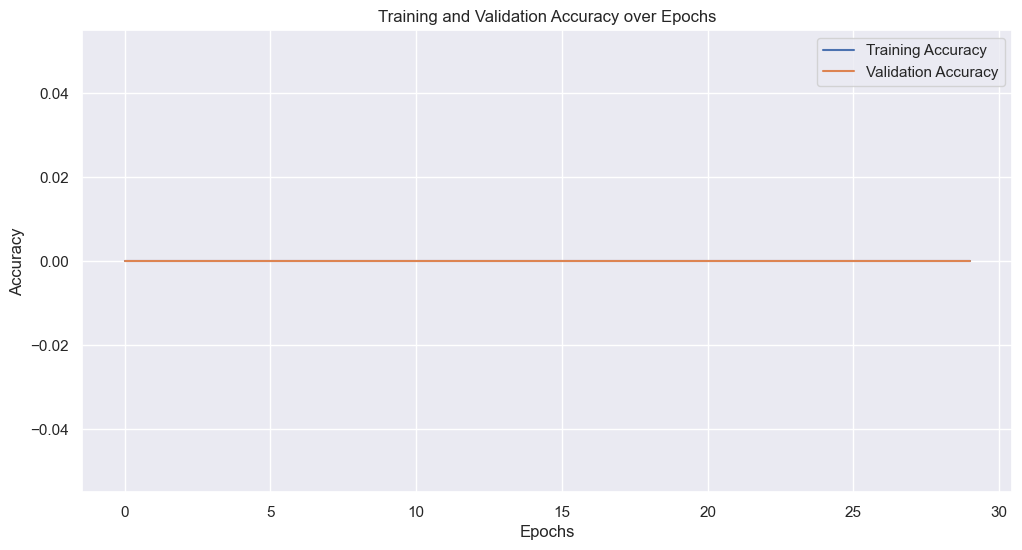

In [36]:
# plotting training and validation accuracy

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()